# Python Basics 

## Data Structure

In [1]:
import json

In [2]:
# opening json file and load it as list of dictionaries
with open("data/brent-daily_json.json") as f:
    brent_daily = json.load(f)

In [3]:
# forward indexing
brent_daily[0]

{'Date': '1987-05-20', 'Price': 18.63}

In [4]:
# backward indexing
brent_daily[-1]

{'Date': '2020-08-28', 'Price': 45.22}

In [5]:
# forward slicing 
brent_daily[:10]

[{'Date': '1987-05-20', 'Price': 18.63},
 {'Date': '1987-05-21', 'Price': 18.45},
 {'Date': '1987-05-22', 'Price': 18.55},
 {'Date': '1987-05-25', 'Price': 18.6},
 {'Date': '1987-05-26', 'Price': 18.63},
 {'Date': '1987-05-27', 'Price': 18.6},
 {'Date': '1987-05-28', 'Price': 18.6},
 {'Date': '1987-05-29', 'Price': 18.58},
 {'Date': '1987-06-01', 'Price': 18.65},
 {'Date': '1987-06-02', 'Price': 18.68}]

In [6]:
# backword slicing 
brent_daily[-15:-10]

[{'Date': '2020-08-10', 'Price': 44.19},
 {'Date': '2020-08-11', 'Price': 43.68},
 {'Date': '2020-08-12', 'Price': 45.09},
 {'Date': '2020-08-13', 'Price': 44.87},
 {'Date': '2020-08-14', 'Price': 44.86}]

In [7]:
# single line looping
[p["Price"] for p in brent_daily[:10]]

[18.63, 18.45, 18.55, 18.6, 18.63, 18.6, 18.6, 18.58, 18.65, 18.68]

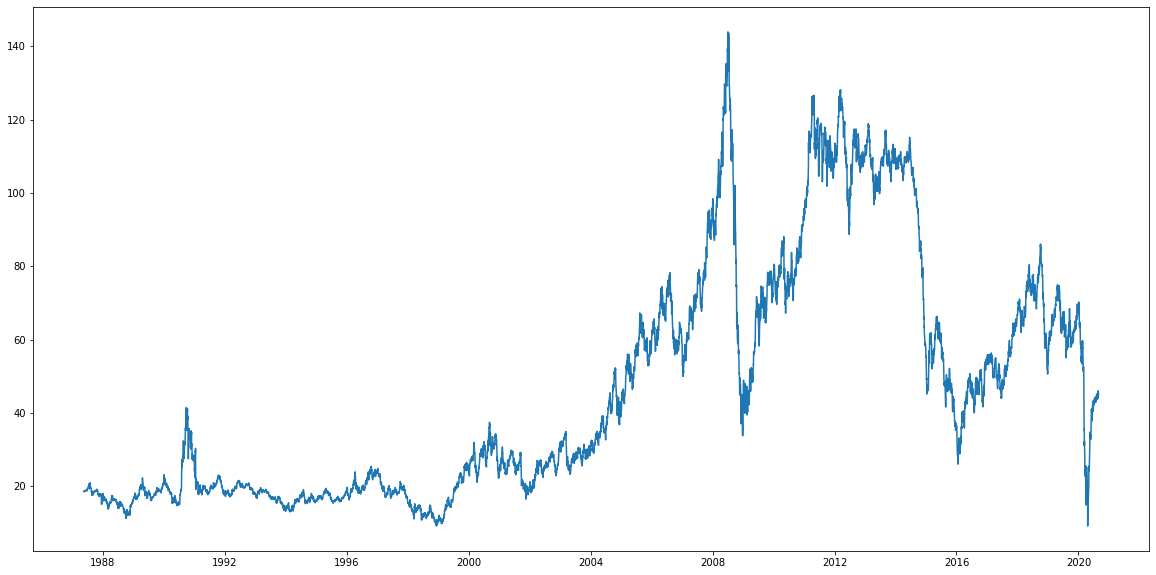

In [8]:
%matplotlib inline # to output charts inline after execution
import matplotlib.pyplot as plt # plotting library
import datetime # to convert textual variables to date and time object

# getting dates x-axis
x = [p["Date"] for p in brent_daily]
# getting prices y-axis
y = [p["Price"] for p in brent_daily]
# converting string dates to datetime objects
x_dt = [datetime.datetime.strptime(xi,"%Y-%m-%d").date() for xi in x]
# plotting datetime vs prices
plt.plot(x_dt,y)
# increasing figure size. gcf(): get current figure
plt.gcf().set_size_inches((20,10))

##  Basic Object Oriented Programming

### Functions
While working on a project, often situations are encountered where a block of code is required to be executed in a repeated manner with different arguments. The code is organized in a much more reusable pieces which are known as 'functions'. In Python, they could be created by using def or lambda statement. An example of a case where a function can be used to convert units is shown below. Every time we need to convert the units again, we can simply call the function and pass the new argument.

In [1]:
# function to convert units for mud weight
def unit_conversion(a):
    '''
    This function is used to convert units of mud weight.
    
    Input: Mud Weight in kg/m3
    Output: Mud Weight in ppg or psi/ft or specific gravity
    
    '''
    print('The entered mud weight in kg/m3 is:', a)
    mw_ppg = a * 0.0083454
    mw_psift = a * 0.000434
    sp_gravity = a * 0.001
    print('Mud Weight in ppg:', mw_ppg)
    print('Mud Weight in psi/ft:', mw_psift)
    print('Specific Gravity:', sp_gravity)

In [2]:
# enter the input for mud weight in kg/m3
mud_weight = 1250
unit_conversion(mud_weight)

The entered mud weight in kg/m3 is: 1250
Mud Weight in ppg: 10.43175
Mud Weight in psi/ft: 0.5425
Specific Gravity: 1.25


### Classes
When we are using only functions as blocks of statements within a code, it is called procedure-oriented way of programming. However there is another way of writing more complicated programs commonly known as object-oriented programming (OOP). Data and functionality (i.e. properties and behavior) is wrapped inside a class and object which are the two main aspects of OOP. Class is used to create a user-defined data structures with information related to a particular characteristic. It can be thought of as a blueprint which can be filled out with different instances. Different objects are created within a class which contain attributes. An example of a simple class is shown below. For a more detailed description of classes the readers are recommended to refer to https://docs.python.org/3/tutorial/classes.html.

In [10]:
class well():
    # class attribute
    well_type = 'oil well'
    
    # initializer
    def __init__(self, api, basin, oil_prod, gas_prod):
        self.api = api
        self.basin = basin
        self.oil_prod = oil_prod # BBL
        self.gas_prod = gas_prod # MCF
        
    # instance method
    def boe_calc(self):
        boe = self.oil_prod + self.gas_prod/5.8
        return boe   

In [11]:
# instantiating the class
well_1 = well(12345, 'Williston', 1000, 5000)

# calling a method of the class
print(well_1.boe_calc()) # boe production of well_1

well_2 = well(78910, 'Permian', 2000, 6000)
print(well_2.boe_calc()) # boe production of well_1

1862.0689655172414
3034.4827586206898


In [12]:
# access the instance attributes
print('API for first well is:', well_1.api, 'and its in', well_1.basin, 'Basin')
if well_1.well_type == 'oil well':
    print("{0} belongs to {1} category".format(well_1.api, well_1.well_type))

API for first well is: 12345 and its in Williston Basin
12345 belongs to oil well category
